In [1]:
pip install sktime


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [1]:
dataset_names = [
 'Adiac',
 'ArrowHead',
 'Beef',
 'BeetleFly',
 'BirdChicken',
 'CBF',
 'Car',
 'ChlorineConcentration',
 'Coffee',
 'Computers',
 'DiatomSizeReduction',
 'DistalPhalanxOutlineAgeGroup',
 'DistalPhalanxOutlineCorrect',
 'DistalPhalanxTW',
 'ECG200',
 'ECG5000',
 'ECGFiveDays',
 'Earthquakes',
 'ElectricDevices',
 'FaceAll',
 'FaceFour',
 'FacesUCR',
 'FordA',
 'FordB',
 'Ham',
 'HandOutlines',
 'Haptics',
 'Herring',
 'InlineSkate',
 'InsectWingbeatSound',
 'ItalyPowerDemand',
 'LargeKitchenAppliances',
 'Meat',
 'MedicalImages',
 'MiddlePhalanxOutlineAgeGroup',
 'MiddlePhalanxOutlineCorrect',
 'MiddlePhalanxTW',
 'MoteStrain',
 'OSULeaf',
 'OliveOil',
 'PhalangesOutlinesCorrect',
 'Phoneme',
 'Plane',
 'ProximalPhalanxOutlineAgeGroup',
 'ProximalPhalanxOutlineCorrect',
 'ProximalPhalanxTW',
 'RefrigerationDevices',
 'ScreenType',
 'ShapeletSim',
 'ShapesAll',
 'SmallKitchenAppliances',
 'StarLightCurves',
 'Strawberry',
 'SwedishLeaf',
 'Symbols',
 'ToeSegmentation1',
 'ToeSegmentation2',
 'Trace',
 'TwoLeadECG',
 'UWaveGestureLibraryAll',
 'Wine',
 'Worms',
 'WormsTwoClass'
 ]

In [25]:
from sktime.classification.dictionary_based import WEASEL
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.kernel_based import RocketClassifier
from sktime.datasets import load_UCR_UEA_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [5]:
def save_model(name, database, clf):
    # Specify the directory and filename where you want to save the model
    save_directory = './model/'
    model_filename = f"{name}-{database}.pkl" 

    # Combine the directory and filename to create the full file path
    full_model_path = os.path.join(save_directory, model_filename)

    # Save the trained model to the specified directory
    joblib.dump(clf, full_model_path)


In [ ]:

# Initialize empty lists to store the evaluation metrics
rocket_scores = []
shapelet_scores = []
weasel_scores = []

# Loop through each dataset
# Load the dataset
for name in dataset_names:
    X, y = load_UCR_UEA_dataset(name, return_X_y=True)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the ROCKET classifier
    rocket = RocketClassifier()
    rocket.fit(X_train, y_train)
    
    # Save the trained model
    save_model("Rocket", name, rocket)

    # Initialize and train the ShapeletTransform classifier
    shapelet = ShapeletTransformClassifier()
    shapelet.fit(X_train, y_train)
    
    # Save the trained model
    save_model("Shapelet", name, shapelet)

    # Initialize and train the WEASEL classifier
    weasel = WEASEL()
    weasel.fit(X_train, y_train)

    # Save the trained model
    save_model("WEASEL", name, weasel)
    
    
    # Evaluate the trained classifiers on the testing set
    rocket_pred = rocket.predict(X_test)
    shapelet_pred = shapelet.predict(X_test)
    weasel_pred = weasel.predict(X_test)


    # Calculate and store the accuracy scores
    rocket_accuracy = accuracy_score(y_test, rocket_pred)
    shapelet_accuracy = accuracy_score(y_test, shapelet_pred)
    weasel_accuracy = accuracy_score(y_test, weasel_pred)


    rocket_scores.append((name, rocket_accuracy))
    shapelet_scores.append((name, shapelet_accuracy))
    weasel_scores.append((name, weasel_accuracy))

#
# TODO: Fix these prints to work with tuples and add WEASEL prints
# Print the average accuracy scores for each classifier
#print("Average ROCKET Accuracy:", sum(rocket_scores) / len(rocket_scores))
#print("Average ShapeletTransform Accuracy:", sum(shapelet_scores) / len(shapelet_scores))


In [3]:
# Define a function to evaluate classifier and return statistics
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [ ]:

evals = {     'Rocket': [],
              'Shapelet': [],
              'WEASEL': [],
              }
model = 'Rocket'
for name in dataset_names:
    X_test = np.load(f"{name}/X_test.npy", allow_pickle=True)

    y_test = np.load(f"{name}/y_test.npy", allow_pickle=True)
    classifier = joblib.load(f"{name}/{model}-{name}.pkl")
    accuracy, precision, recall, f1 = evaluate_classifier(classifier, X_test, y_test)
    evals[model].append((name, (accuracy, precision, recall, f1)))
evals

In [ ]:

import pandas as pd

model = 'Shapelet'
for name in dataset_names:
    X_test = np.load(f"{name}/X_test.npy", allow_pickle=True)
    y_test = np.load(f"{name}/y_test.npy", allow_pickle=True)
    X_test = pd.DataFrame(X_test)    
    classifier = joblib.load(f"{name}/{model}-{name}.pkl")
    accuracy, precision, recall, f1 = evaluate_classifier(classifier, X_test, y_test)
    evals[model].append((name, (accuracy, precision, recall, f1)))
    print(name)
evals


In [4]:
evals = {'Rocket': [('Adiac',
   (0.7872340425531915,
    0.8260679745786128,
    0.7872340425531915,
    0.7840465819815006)),
  ('ArrowHead', (0.953125, 0.953125, 0.953125, 0.953125)),
  ('Beef',
   (0.8888888888888888,
    0.9166666666666666,
    0.8888888888888888,
    0.890652557319224)),
  ('BeetleFly',
   (0.9166666666666666,
    0.9285714285714285,
    0.9166666666666666,
    0.9160839160839161)),
  ('BirdChicken',
   (0.8333333333333334, 0.875, 0.8333333333333334, 0.8285714285714286)),
  ('CBF', (1.0, 1.0, 1.0, 1.0)),
  ('Car',
   (0.9722222222222222,
    0.976190476190476,
    0.9722222222222222,
    0.9723646723646725)),
  ('ChlorineConcentration',
   (0.9984532095901005,
    0.9984559232574863,
    0.9984532095901005,
    0.9984536111995296)),
  ('Coffee', (1.0, 1.0, 1.0, 1.0)),
  ('Computers',
   (0.8866666666666667,
    0.8908819345661452,
    0.8866666666666667,
    0.8868431590656284)),
  ('DiatomSizeReduction', (1.0, 1.0, 1.0, 1.0)),
  ('DistalPhalanxOutlineAgeGroup',
   (0.8395061728395061,
    0.8614037888463175,
    0.8395061728395061,
    0.8440676811503071)),
  ('DistalPhalanxOutlineCorrect',
   (0.8593155893536122,
    0.8584559879670537,
    0.8593155893536122,
    0.8577976277982019)),
  ('DistalPhalanxTW',
   (0.7962962962962963,
    0.7601388334364098,
    0.7962962962962963,
    0.7721060753647477)),
  ('ECG200',
   (0.9666666666666667,
    0.9682170542635659,
    0.9666666666666667,
    0.9661375661375662)),
  ('ECG5000',
   (0.9533333333333334,
    0.9485690089442018,
    0.9533333333333334,
    0.9501545395245139)),
  ('ECGFiveDays', (1.0, 1.0, 1.0, 1.0)),
  ('Earthquakes',
   (0.7841726618705036,
    0.721703553187984,
    0.7841726618705036,
    0.7331391085478726)),
  ('ElectricDevices',
   (0.9032451923076923,
    0.9069445171747882,
    0.9032451923076923,
    0.9033589844189348)),
  ('FaceAll',
   (0.9940740740740741,
    0.9942513338513338,
    0.9940740740740741,
    0.994111884609984)),
  ('FaceFour', (1.0, 1.0, 1.0, 1.0)),
  ('FacesUCR',
   (0.9955555555555555,
    0.9956028941068883,
    0.9955555555555555,
    0.9955442643399021)),
  ('FordA',
   (0.933649289099526,
    0.9336860990747092,
    0.933649289099526,
    0.9336402806733434)),
  ('FordB',
   (0.9190404797601199,
    0.9195923488284546,
    0.9190404797601199,
    0.919018637622772)),
  ('Ham',
   (0.8307692307692308,
    0.8438330170777988,
    0.8307692307692308,
    0.8323960586397502)),
  ('HandOutlines',
   (0.9416058394160584,
    0.9417523144051531,
    0.9416058394160584,
    0.9410434192315452)),
  ('Haptics',
   (0.6258992805755396,
    0.6254323952165679,
    0.6258992805755396,
    0.6191674722415234)),
  ('Herring',
   (0.6666666666666666,
    0.6604938271604939,
    0.6666666666666666,
    0.6631446540880503)),
  ('InlineSkate',
   (0.7589743589743589,
    0.7659969146545315,
    0.7589743589743589,
    0.7591371982141213)),
  ('InsectWingbeatSound',
   (0.7484848484848485,
    0.7509760214142114,
    0.7484848484848485,
    0.7451595282196757)),
  ('ItalyPowerDemand',
   (0.9574468085106383,
    0.9574468085106383,
    0.9574468085106383,
    0.9574468085106383)),
  ('LargeKitchenAppliances',
   (0.9244444444444444,
    0.9253983443457128,
    0.9244444444444444,
    0.9241954797150427)),
  ('Meat',
   (0.9444444444444444,
    0.9523809523809523,
    0.9444444444444444,
    0.9444444444444444)),
  ('MedicalImages',
   (0.880466472303207,
    0.8836373972306703,
    0.880466472303207,
    0.8741638262619463)),
  ('MiddlePhalanxOutlineAgeGroup',
   (0.688622754491018,
    0.6841127870840598,
    0.688622754491018,
    0.6751035743638772)),
  ('MiddlePhalanxOutlineCorrect',
   (0.8656716417910447,
    0.8662974990391769,
    0.8656716417910447,
    0.8659344529501657)),
  ('MiddlePhalanxTW',
   (0.5542168674698795,
    0.5008035213048816,
    0.5542168674698795,
    0.5139054679709589)),
  ('MoteStrain',
   (0.981675392670157,
    0.9817912893919601,
    0.981675392670157,
    0.9816727546804129)),
  ('OSULeaf',
   (0.9699248120300752,
    0.9724696356275305,
    0.9699248120300752,
    0.9700380983418299)),
  ('OliveOil',
   (0.9444444444444444,
    0.9583333333333334,
    0.9444444444444444,
    0.9458874458874459)),
  ('PhalangesOutlinesCorrect',
   (0.8458646616541353,
    0.8462324484537334,
    0.8458646616541353,
    0.84178711224904)),
  ('Phoneme',
   (0.41390205371248023,
    0.4263098651265666,
    0.41390205371248023,
    0.383948695935011)),
  ('Plane', (1.0, 1.0, 1.0, 1.0)),
  ('ProximalPhalanxOutlineAgeGroup',
   (0.8571428571428571,
    0.8571428571428571,
    0.8571428571428571,
    0.8571428571428571)),
  ('ProximalPhalanxOutlineCorrect',
   (0.9216417910447762,
    0.9219807407064059,
    0.9216417910447762,
    0.9206318391518166)),
  ('ProximalPhalanxTW',
   (0.8516483516483516,
    0.8264892842854163,
    0.8516483516483516,
    0.8328138188330549)),
  ('RefrigerationDevices',
   (0.7955555555555556,
    0.8006515295404185,
    0.7955555555555556,
    0.7970359774417745)),
  ('ScreenType',
   (0.6666666666666666,
    0.6674817674817675,
    0.6666666666666666,
    0.6658939946583259)),
  ('ShapeletSim', (1.0, 1.0, 1.0, 1.0)),
  ('ShapesAll', (0.925, 0.9409446649029983, 0.925, 0.919546253635521)),
  ('SmallKitchenAppliances',
   (0.8533333333333334,
    0.8597265315101353,
    0.8533333333333334,
    0.8521345704391464)),
  ('StarLightCurves',
   (0.9790689281847709,
    0.9793014242423079,
    0.9790689281847709,
    0.9785875218733016)),
  ('Strawberry',
   (0.9796610169491525,
    0.9801808106744997,
    0.9796610169491525,
    0.9797314730282224)),
  ('SwedishLeaf',
   (0.9733727810650887,
    0.9758382642998029,
    0.9733727810650887,
    0.9736186163016122)),
  ('Symbols',
   (0.9967320261437909,
    0.9968098350451291,
    0.9967320261437909,
    0.9967375041513027)),
  ('ToeSegmentation1',
   (0.9876543209876543,
    0.9879792072774529,
    0.9876543209876543,
    0.9876656733361715)),
  ('ToeSegmentation2', (0.96, 0.96, 0.96, 0.96)),
  ('Trace', (1.0, 1.0, 1.0, 1.0)),
  ('TwoLeadECG', (1.0, 1.0, 1.0, 1.0)),
  ('UWaveGestureLibraryAll',
   (0.9813988095238095,
    0.9818165949379593,
    0.9813988095238095,
    0.9813267036913225)),
  ('Wine', (1.0, 1.0, 1.0, 1.0)),
  ('Worms',
   (0.6282051282051282,
    0.6633921633921633,
    0.6282051282051282,
    0.6199304968535737)),
  ('WormsTwoClass',
   (0.7307692307692307,
    0.7292264385860445,
    0.7307692307692307,
    0.7298754015510962))],
 'Shapelet': [('Adiac',
   (0.7829787234042553,
    0.7779796444690061,
    0.7829787234042553,
    0.768527957927207)),
  ('ArrowHead', (0.921875, 0.9253624512670564, 0.921875, 0.9225515288015288)),
  ('Beef',
   (0.7222222222222222,
    0.6574074074074074,
    0.7222222222222222,
    0.6767676767676767)),
  ('BeetleFly',
   (0.9166666666666666,
    0.9285714285714285,
    0.9166666666666666,
    0.9160839160839161)),
  ('BirdChicken',
   (0.9166666666666666,
    0.9285714285714285,
    0.9166666666666666,
    0.9160839160839161)),
  ('CBF', (1.0, 1.0, 1.0, 1.0)),
  ('Car',
   (0.9444444444444444,
    0.9583333333333334,
    0.9444444444444444,
    0.9468253968253969)),
  ('ChlorineConcentration',
   (0.9961330239752514,
    0.9961606058299214,
    0.9961330239752514,
    0.9961313055028562)),
  ('Coffee', (1.0, 1.0, 1.0, 1.0)),
  ('Computers', (0.82, 0.823, 0.82, 0.8184577723378212)),
  ('DiatomSizeReduction', (1.0, 1.0, 1.0, 1.0)),
  ('DistalPhalanxOutlineAgeGroup',
   (0.8703703703703703,
    0.8932120850725501,
    0.8703703703703703,
    0.8741892859042617)),
  ('DistalPhalanxOutlineCorrect',
   (0.8593155893536122,
    0.8590452122472092,
    0.8593155893536122,
    0.8591673743110225)),
  ('DistalPhalanxTW',
   (0.7962962962962963,
    0.7577931202592448,
    0.7962962962962963,
    0.7697104301883121)),
  ('ECG200', (0.95, 0.95125, 0.95, 0.950332383665717)),
  ('ECG5000',
   (0.9553333333333334,
    0.9494480167076739,
    0.9553333333333334,
    0.9493004206875356)),
  ('ECGFiveDays', (1.0, 1.0, 1.0, 1.0)),
  ('Earthquakes',
   (0.7913669064748201,
    0.6365342508601814,
    0.7913669064748201,
    0.7055560370980324)),
  ('ElectricDevices',
   (0.8934294871794872,
    0.8960792405224638,
    0.8934294871794872,
    0.8925269024824336)),
  ('FaceAll',
   (0.965925925925926,
    0.9668626881968068,
    0.965925925925926,
    0.9656802759617895)),
  ('FaceFour', (1.0, 1.0, 1.0, 1.0)),
  ('FacesUCR',
   (0.9777777777777777,
    0.9784316253516468,
    0.9777777777777777,
    0.9778170440888279)),
  ('FordA',
   (0.940419769803656,
    0.9404198319056236,
    0.940419769803656,
    0.9404180757614283)),
  ('FordB',
   (0.9122938530734632,
    0.91279365941984,
    0.9122938530734632,
    0.91227231097931)),
  ('Ham',
   (0.8461538461538461,
    0.8552380952380954,
    0.8461538461538461,
    0.8474903474903475)),
  ('HandOutlines',
   (0.9099756690997567,
    0.909383252507811,
    0.9099756690997567,
    0.9093848356317098)),
  ('Haptics',
   (0.6258992805755396,
    0.6237678355818708,
    0.6258992805755396,
    0.6166583149771557)),
  ('Herring',
   (0.717948717948718,
    0.7057471264367816,
    0.717948717948718,
    0.7072463768115943)),
  ('InlineSkate',
   (0.676923076923077,
    0.6959406595207812,
    0.676923076923077,
    0.68127441572512)),
  ('InsectWingbeatSound',
   (0.7181818181818181,
    0.722725281247448,
    0.7181818181818181,
    0.7152314080083971)),
  ('ItalyPowerDemand',
   (0.9513677811550152,
    0.9516100057674671,
    0.9513677811550152,
    0.9513479900189703)),
  ('LargeKitchenAppliances',
   (0.8933333333333333,
    0.8968556531214759,
    0.8933333333333333,
    0.893442208765352)),
  ('Meat',
   (0.9722222222222222,
    0.9743589743589745,
    0.9722222222222222,
    0.9722633744855967)),
  ('MedicalImages',
   (0.8629737609329446,
    0.8571469723592543,
    0.8629737609329446,
    0.8513510836121044)),
  ('MiddlePhalanxOutlineAgeGroup',
   (0.7305389221556886,
    0.759531636028642,
    0.7305389221556886,
    0.7150956074242933)),
  ('MiddlePhalanxOutlineCorrect',
   (0.8582089552238806,
    0.8577162208166849,
    0.8582089552238806,
    0.8579123389685962)),
  ('MiddlePhalanxTW',
   (0.5903614457831325,
    0.5248042862695019,
    0.5903614457831325,
    0.5390592162385217)),
  ('MoteStrain',
   (0.9895287958115183,
    0.9895836188700968,
    0.9895287958115183,
    0.9895290828511069)),
  ('OSULeaf',
   (0.9398496240601504,
    0.9453178400546822,
    0.9398496240601504,
    0.9383458646616543)),
  ('OliveOil',
   (0.8333333333333334,
    0.8333333333333334,
    0.8333333333333334,
    0.8333333333333334)),
  ('PhalangesOutlinesCorrect',
   (0.8483709273182958,
    0.8472221328443457,
    0.8483709273182958,
    0.8457715412581239)),
  ('Phoneme',
   (0.4881516587677725,
    0.4949508062472106,
    0.4881516587677725,
    0.4514840638147667)),
  ('Plane', (1.0, 1.0, 1.0, 1.0)),
  ('ProximalPhalanxOutlineAgeGroup',
   (0.8681318681318682,
    0.8691152691152692,
    0.8681318681318682,
    0.8678337528741269)),
  ('ProximalPhalanxOutlineCorrect',
   (0.8917910447761194,
    0.8923586852969198,
    0.8917910447761194,
    0.8896630163090818)),
  ('ProximalPhalanxTW',
   (0.7912087912087912,
    0.7642187311275151,
    0.7912087912087912,
    0.7726733274636076)),
  ('RefrigerationDevices',
   (0.7955555555555556,
    0.7961132201132202,
    0.7955555555555556,
    0.7954476506357102)),
  ('ScreenType',
   (0.7066666666666667,
    0.7126167166167167,
    0.7066666666666667,
    0.7067812725090036)),
  ('ShapeletSim', (1.0, 1.0, 1.0, 1.0)),
  ('ShapesAll',
   (0.8583333333333333,
    0.8778122494789162,
    0.8583333333333333,
    0.8509492726056195)),
  ('SmallKitchenAppliances',
   (0.84, 0.8454100911424297, 0.84, 0.8394739552386611)),
  ('StarLightCurves',
   (0.9779862865391555,
    0.978134793903615,
    0.9779862865391555,
    0.9774919179425616)),
  ('Strawberry',
   (0.9864406779661017,
    0.9869164436515017,
    0.9864406779661017,
    0.9864876486854814)),
  ('SwedishLeaf',
   (0.9437869822485208,
    0.9455746522106417,
    0.9437869822485208,
    0.9436048141369493)),
  ('Symbols',
   (0.9901960784313726,
    0.990678238508518,
    0.9901960784313726,
    0.9901335068651437)),
  ('ToeSegmentation1',
   (0.9876543209876543,
    0.9879792072774529,
    0.9876543209876543,
    0.9876656733361715)),
  ('ToeSegmentation2', (0.92, 0.9274603174603174, 0.92, 0.921995841995842)),
  ('Trace', (1.0, 1.0, 1.0, 1.0)),
  ('TwoLeadECG', (1.0, 1.0, 1.0, 1.0)),
  ('UWaveGestureLibraryAll',
   (0.9724702380952381,
    0.9726642477685852,
    0.9724702380952381,
    0.9723117262593013)),
  ('Wine',
   (0.9705882352941176,
    0.972549019607843,
    0.9705882352941176,
    0.9707182607791127)),
  ('Worms',
   (0.6153846153846154,
    0.5602389063927525,
    0.6153846153846154,
    0.5753147112796235)),
  ('WormsTwoClass',
   (0.7307692307692307,
    0.732590676310649,
    0.7307692307692307,
    0.7315590363045066))],
 'WEASEL': []}

In [8]:


model = 'WEASEL'
for name in dataset_names:
    X_test = np.load(f"{name}/X_test.npy", allow_pickle=True)
    y_test = np.load(f"{name}/y_test.npy", allow_pickle=True)
    X_test = pd.DataFrame(X_test)    
    classifier = joblib.load(f"{name}/{model}-{name}.pkl")
    accuracy, precision, recall, f1 = evaluate_classifier(classifier, X_test, y_test)
    evals[model].append((name, (accuracy, precision, recall, f1)))
    print(name)
evals


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map inste

Adiac
ArrowHead


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Beef
BeetleFly


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


BirdChicken


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


CBF


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Car


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ChlorineConcentration
Coffee


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Computers


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


DiatomSizeReduction


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


DistalPhalanxOutlineAgeGroup


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


DistalPhalanxOutlineCorrect


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


DistalPhalanxTW
ECG200


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ECG5000


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ECGFiveDays


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Earthquakes


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ElectricDevices


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


FaceAll


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


FaceFour


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


FacesUCR


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


FordA


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


FordB


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Ham


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


HandOutlines


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Haptics


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Herring


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


InlineSkate


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


InsectWingbeatSound
ItalyPowerDemand


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


LargeKitchenAppliances


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Meat


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


MedicalImages


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


MiddlePhalanxOutlineAgeGroup


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


MiddlePhalanxOutlineCorrect


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MiddlePhalanxTW


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


MoteStrain


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


OSULeaf


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


OliveOil


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


PhalangesOutlinesCorrect


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map inste

Phoneme
Plane


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ProximalPhalanxOutlineAgeGroup


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ProximalPhalanxOutlineCorrect


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ProximalPhalanxTW


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


RefrigerationDevices


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ScreenType


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ShapeletSim


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ShapesAll


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


SmallKitchenAppliances


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


StarLightCurves


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Strawberry


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


SwedishLeaf


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Symbols


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ToeSegmentation1


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


ToeSegmentation2


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Trace


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


TwoLeadECG


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


UWaveGestureLibraryAll
Wine


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


Worms


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return X.applymap(_cell_is_series_or_array)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\datatypes\_panel\_convert.py:889: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(_convert_series_cell_to_numpy)


WormsTwoClass


{'Rocket': [('Adiac',
   (0.7872340425531915,
    0.8260679745786128,
    0.7872340425531915,
    0.7840465819815006)),
  ('ArrowHead', (0.953125, 0.953125, 0.953125, 0.953125)),
  ('Beef',
   (0.8888888888888888,
    0.9166666666666666,
    0.8888888888888888,
    0.890652557319224)),
  ('BeetleFly',
   (0.9166666666666666,
    0.9285714285714285,
    0.9166666666666666,
    0.9160839160839161)),
  ('BirdChicken',
   (0.8333333333333334, 0.875, 0.8333333333333334, 0.8285714285714286)),
  ('CBF', (1.0, 1.0, 1.0, 1.0)),
  ('Car',
   (0.9722222222222222,
    0.976190476190476,
    0.9722222222222222,
    0.9723646723646725)),
  ('ChlorineConcentration',
   (0.9984532095901005,
    0.9984559232574863,
    0.9984532095901005,
    0.9984536111995296)),
  ('Coffee', (1.0, 1.0, 1.0, 1.0)),
  ('Computers',
   (0.8866666666666667,
    0.8908819345661452,
    0.8866666666666667,
    0.8868431590656284)),
  ('DiatomSizeReduction', (1.0, 1.0, 1.0, 1.0)),
  ('DistalPhalanxOutlineAgeGroup',
   (0.83

In [4]:
name = 'Meat'
model = 'WEASEL'
classifier = joblib.load(f"{name}/{model}-{name}.pkl")


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numba\typed\typeddict.py:34: NumbaTypeSafetyWarning: unsafe cast from int64 to uint32. Precision may be lost.
  d[key] = value


In [9]:
import json
# Specify the file path where you want to save the JSON file
file_path = "output.json"

# Save the dictionary as a JSON file
with open(file_path, "w") as json_file:
    json.dump(evals, json_file)

In [4]:
import json

# Open the JSON file
with open('output.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)

# Now 'data' contains the contents of the JSON file
# You can access the data as needed
print(data)


{'Rocket': [['Adiac', [0.7872340425531915, 0.8260679745786128, 0.7872340425531915, 0.7840465819815006]], ['ArrowHead', [0.953125, 0.953125, 0.953125, 0.953125]], ['Beef', [0.8888888888888888, 0.9166666666666666, 0.8888888888888888, 0.890652557319224]], ['BeetleFly', [0.9166666666666666, 0.9285714285714285, 0.9166666666666666, 0.9160839160839161]], ['BirdChicken', [0.8333333333333334, 0.875, 0.8333333333333334, 0.8285714285714286]], ['CBF', [1.0, 1.0, 1.0, 1.0]], ['Car', [0.9722222222222222, 0.976190476190476, 0.9722222222222222, 0.9723646723646725]], ['ChlorineConcentration', [0.9984532095901005, 0.9984559232574863, 0.9984532095901005, 0.9984536111995296]], ['Coffee', [1.0, 1.0, 1.0, 1.0]], ['Computers', [0.8866666666666667, 0.8908819345661452, 0.8866666666666667, 0.8868431590656284]], ['DiatomSizeReduction', [1.0, 1.0, 1.0, 1.0]], ['DistalPhalanxOutlineAgeGroup', [0.8395061728395061, 0.8614037888463175, 0.8395061728395061, 0.8440676811503071]], ['DistalPhalanxOutlineCorrect', [0.85931

In [75]:
def plot_wins(rocket_wins, shapelet_wins, weasel_wins, draw, parameter):
    # Define the labels and values for the bar plot
    labels = ['Rocket', 'Shapelet', 'WEASEL', 'Draw']
    wins = [rocket_wins, shapelet_wins, weasel_wins, draw]

    # Plot the bar graph
    plt.bar(labels, wins, color=['#87CEFA', '#98FB98', '#FFA07A', '#FFD700'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add text labels on top of each bar
    for i in range(len(labels)):
        plt.text(i, wins[i], str(wins[i]), ha='center', va='bottom')

    plt.xlabel('Models')
    plt.ylabel('Wins')
    plt.title(f'Model {parameter} Comparison')
    plt.tight_layout()  # Adjust layout to prevent clipping

    plt.show()

In [5]:
rocket_data = data['Rocket']
shapelet_data = data['Shapelet']
weasel_data = data['WEASEL']

In [77]:
def count_wins(rocket_data, shapelet_data, weasel_data, parameter, index):
    rocket_wins = shapelet_wins = weasel_wins = draw = 0
    for rocket_model, shapelet_model, weasel_model in zip(rocket_data, shapelet_data, weasel_data):
        rocket_parameter = rocket_model[1][index]
        shapelet_parameter = shapelet_model[1][index]
        weasel_parameter = weasel_model[1][index]
        if  rocket_parameter > shapelet_parameter and rocket_parameter > weasel_parameter:
            rocket_wins += 1
        elif shapelet_parameter > rocket_parameter and shapelet_parameter > weasel_parameter:
            shapelet_wins += 1
        elif weasel_parameter > rocket_parameter and weasel_parameter > shapelet_parameter:
            weasel_wins += 1
        else:
            # Draw, no one wins
            draw += 1
    plot_wins(rocket_wins, shapelet_wins, weasel_wins, draw, parameter)

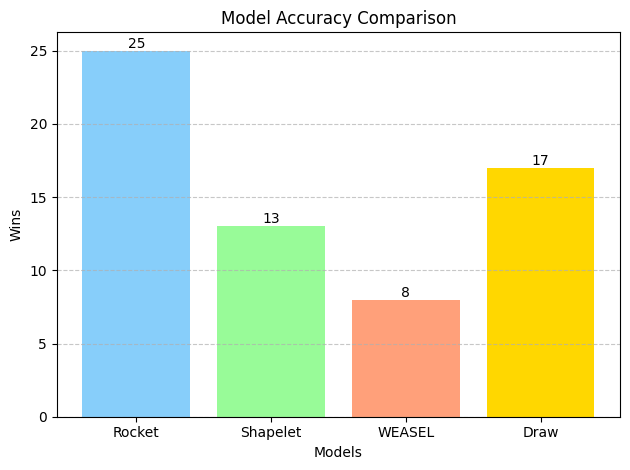

In [78]:
count_wins(rocket_data, shapelet_data, weasel_data, 'Accuracy', 0)

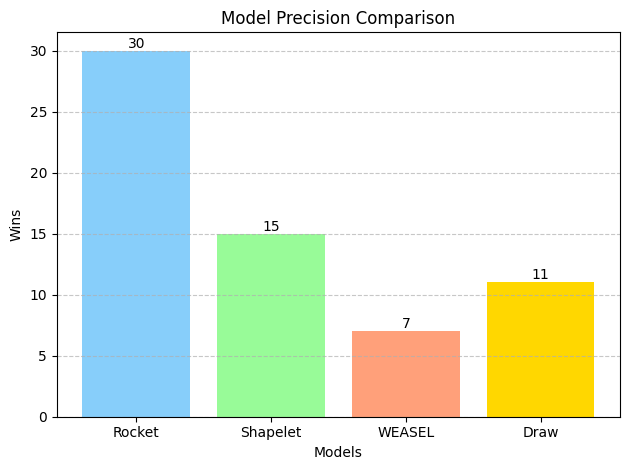

In [79]:
count_wins(rocket_data, shapelet_data, weasel_data, 'Precision', 1)

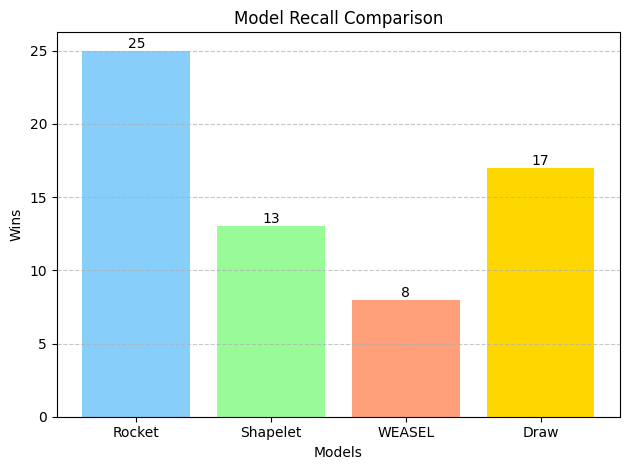

In [80]:
count_wins(rocket_data, shapelet_data, weasel_data, 'Recall', 2)

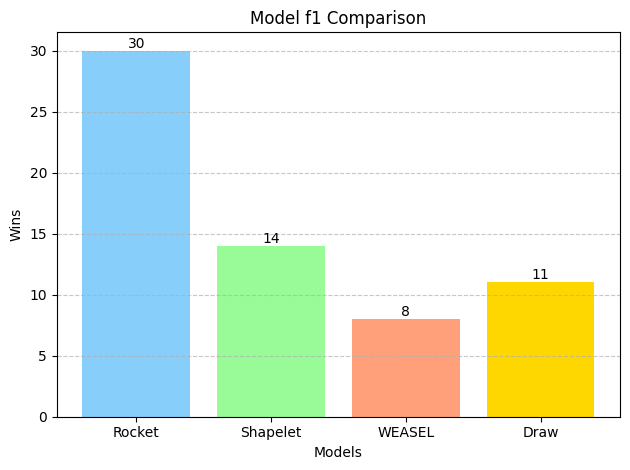

In [81]:
count_wins(rocket_data, shapelet_data, weasel_data, 'f1', 3)

In [24]:
import matplotlib.pyplot as plt

def plot_model_performance(x_label, y_label, x_data, y_data, parameter="Accuracy", index=0):
    # Assuming you have the accuracy data for each model
    x_arr = []
    y_arr = []
    model_wins = {'Model X': 0, 'Model Y': 0, 'Draws': 0}  # Initialize wins and draws counter for each model

    # Iterate over the data for each model
    for model_x, model_y in zip(x_data, y_data):
        x_val = model_x[1][index]
        y_val = model_y[1][index]
        x_arr.append(x_val)
        y_arr.append(y_val)

        # Update wins or draws counter based on comparison
        if x_val > y_val:
            model_wins['Model X'] += 1
        elif y_val > x_val:
            model_wins['Model Y'] += 1
        else:
            model_wins['Draws'] += 1

    # Plotting the scatter plot
    plt.scatter(x_arr, y_arr, color='blue', label= parameter)


    # Set the range for both x and y axes to be from 0 to 1
    plt.xlim(0, 1)  
    plt.ylim(0, 1)  

    # Plotting the line y = x
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')

    plt.xlabel(f'{x_label} {parameter}')
    plt.ylabel(f'{y_label} {parameter}')
    plt.title(f'Model {parameter} Comparison')
    
    # Annotate number of victories and draws for each model
    plt.text(0.95, 0.05, f'{x_label} Wins: {model_wins["Model X"]}\n{y_label} Wins: {model_wins["Model Y"]}\nDraws: {model_wins["Draws"]}',
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.legend()
    plt.grid(True)
    plt.show()


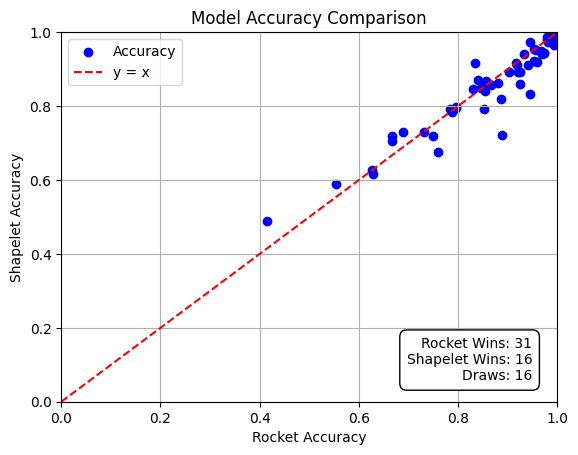

In [25]:
plot_model_performance('Rocket', 'Shapelet', rocket_data, shapelet_data)

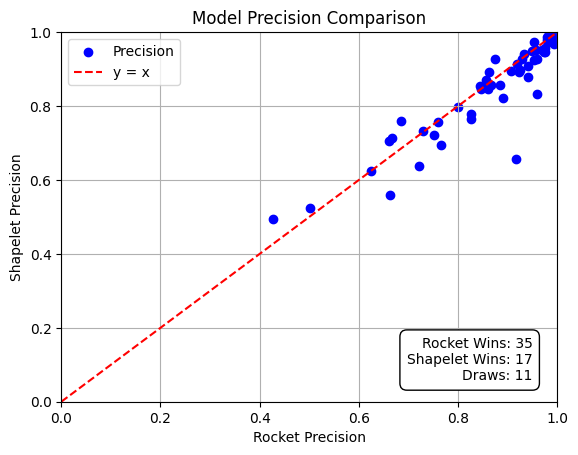

In [26]:
plot_model_performance('Rocket', 'Shapelet', rocket_data, shapelet_data, "Precision", 1)

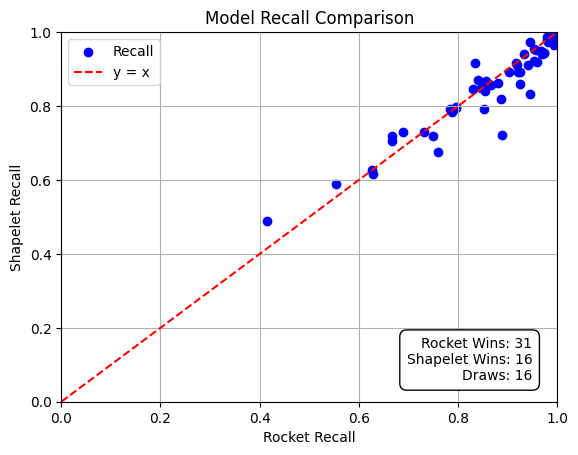

In [27]:
plot_model_performance('Rocket', 'Shapelet', rocket_data, shapelet_data, "Recall", 2)


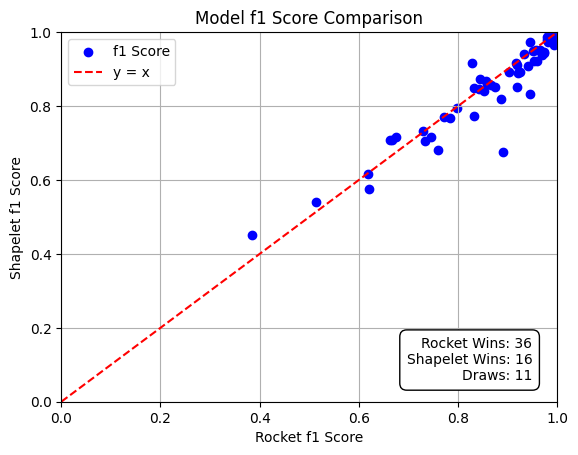

In [28]:
plot_model_performance('Rocket', 'Shapelet', rocket_data, shapelet_data, "f1 Score", 3)

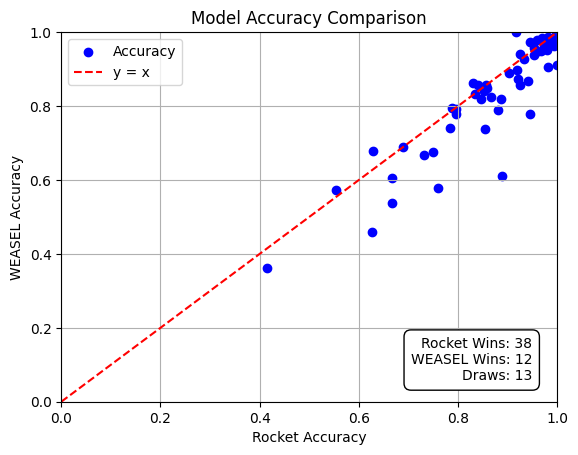

In [29]:
plot_model_performance('Rocket', 'WEASEL', rocket_data, weasel_data)

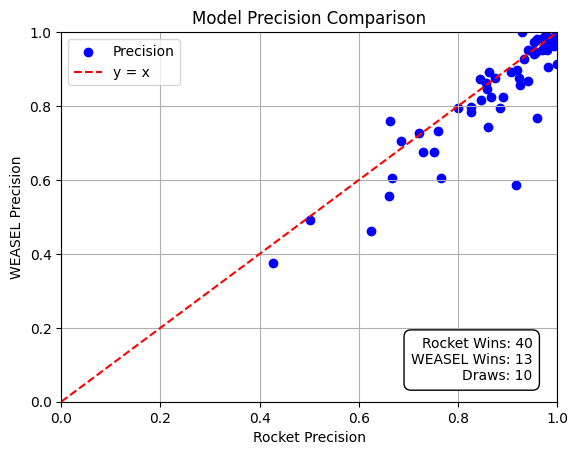

In [30]:
plot_model_performance('Rocket', 'WEASEL', rocket_data, weasel_data, 'Precision', 1)

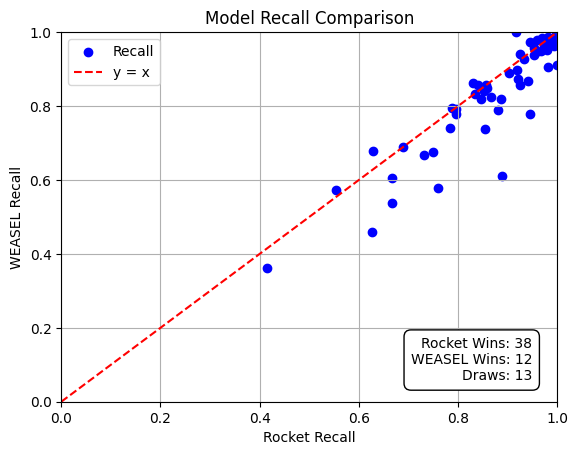

In [31]:
plot_model_performance('Rocket', 'WEASEL', rocket_data, weasel_data, 'Recall', 2)

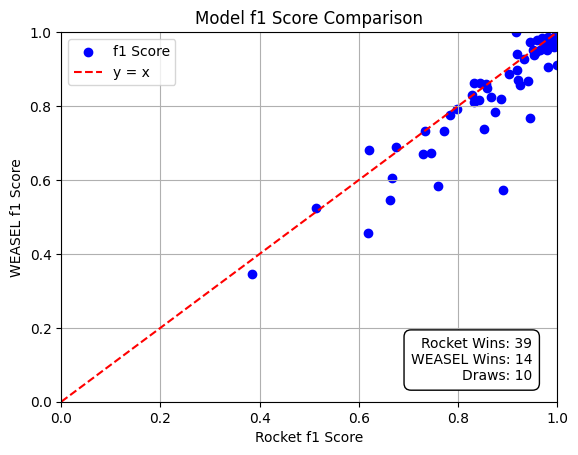

In [32]:
plot_model_performance('Rocket', 'WEASEL', rocket_data, weasel_data, 'f1 Score', 3)

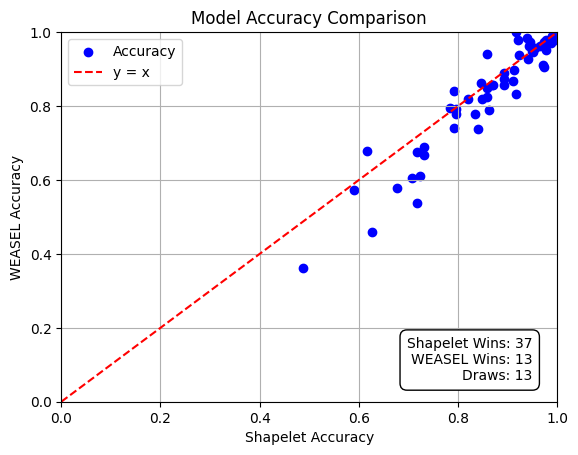

In [33]:
plot_model_performance('Shapelet', 'WEASEL', shapelet_data, weasel_data)

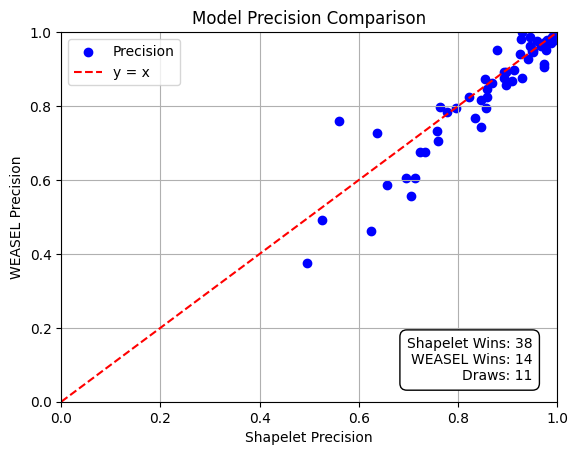

In [34]:
plot_model_performance('Shapelet', 'WEASEL', shapelet_data, weasel_data, 'Precision', 1)

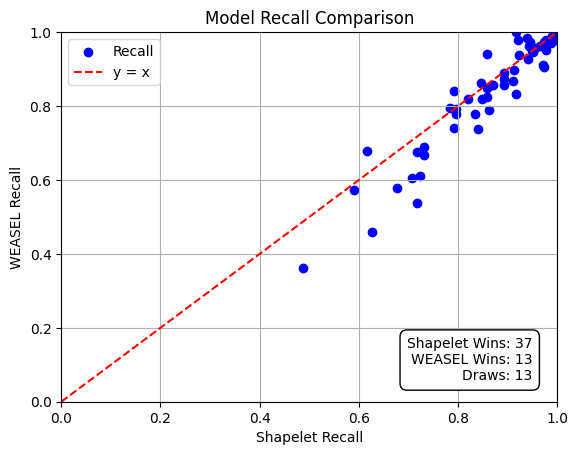

In [35]:
plot_model_performance('Shapelet', 'WEASEL', shapelet_data, weasel_data, 'Recall', 2)

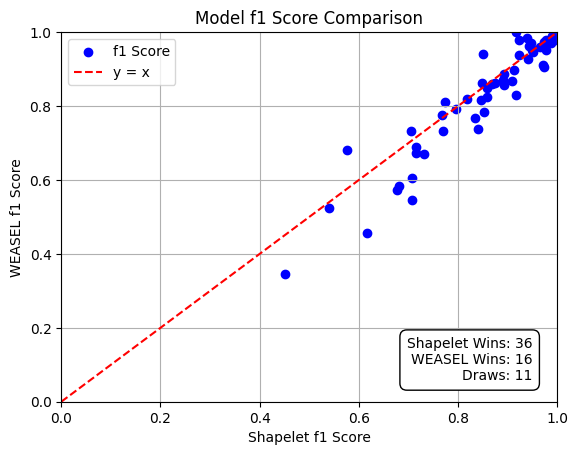

In [36]:
plot_model_performance('Shapelet', 'WEASEL', shapelet_data, weasel_data, 'f1 Score', 3)

In [37]:
datasets = [x[0] for x in rocket_data]
datasets

['Adiac',
 'ArrowHead',
 'Beef',
 'BeetleFly',
 'BirdChicken',
 'CBF',
 'Car',
 'ChlorineConcentration',
 'Coffee',
 'Computers',
 'DiatomSizeReduction',
 'DistalPhalanxOutlineAgeGroup',
 'DistalPhalanxOutlineCorrect',
 'DistalPhalanxTW',
 'ECG200',
 'ECG5000',
 'ECGFiveDays',
 'Earthquakes',
 'ElectricDevices',
 'FaceAll',
 'FaceFour',
 'FacesUCR',
 'FordA',
 'FordB',
 'Ham',
 'HandOutlines',
 'Haptics',
 'Herring',
 'InlineSkate',
 'InsectWingbeatSound',
 'ItalyPowerDemand',
 'LargeKitchenAppliances',
 'Meat',
 'MedicalImages',
 'MiddlePhalanxOutlineAgeGroup',
 'MiddlePhalanxOutlineCorrect',
 'MiddlePhalanxTW',
 'MoteStrain',
 'OSULeaf',
 'OliveOil',
 'PhalangesOutlinesCorrect',
 'Phoneme',
 'Plane',
 'ProximalPhalanxOutlineAgeGroup',
 'ProximalPhalanxOutlineCorrect',
 'ProximalPhalanxTW',
 'RefrigerationDevices',
 'ScreenType',
 'ShapeletSim',
 'ShapesAll',
 'SmallKitchenAppliances',
 'StarLightCurves',
 'Strawberry',
 'SwedishLeaf',
 'Symbols',
 'ToeSegmentation1',
 'ToeSegmentatio

In [92]:
from tabulate import tabulate

# Assuming you have the dataset names and model accuracies as lists
datasets = [x[0] for x in rocket_data]

rocket_accuracy = [x[1][0] for x in rocket_data]
shapelet_accuracy = [x[1][0] for x in shapelet_data]
weasel_accuracy = [x[1][0] for x in weasel_data]

# Create a list of lists where each inner list represents a row in the table
table_data = []
for i, dataset in enumerate(datasets):
    table_data.append([dataset, rocket_accuracy[i], shapelet_accuracy[i], weasel_accuracy[i]])

# Print the table using the tabulate function
headers = ['Dataset', 'Rocket', 'Shapelet', 'Weasel']
print(tabulate(table_data, headers=headers, tablefmt='grid'))


+--------------------------------+----------+------------+----------+
| Dataset                        |   Rocket |   Shapelet |   Weasel |
+================================+==========+============+==========+
| Adiac                          | 0.787234 |   0.782979 | 0.795745 |
+--------------------------------+----------+------------+----------+
| ArrowHead                      | 0.953125 |   0.921875 | 0.9375   |
+--------------------------------+----------+------------+----------+
| Beef                           | 0.888889 |   0.722222 | 0.611111 |
+--------------------------------+----------+------------+----------+
| BeetleFly                      | 0.916667 |   0.916667 | 1        |
+--------------------------------+----------+------------+----------+
| BirdChicken                    | 0.833333 |   0.916667 | 0.833333 |
+--------------------------------+----------+------------+----------+
| CBF                            | 1        |   1        | 1        |
+-------------------